### Gather data and load in file into data


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data into dataframe using pandas
df_cardio_base = pd.read_csv(r'c:\users\HP\Turing_env\cardio_base.csv')
df_cardio_alco = pd.read_csv(r'c:\users\HP\Turing_env\cardio_alco.csv', sep = ';')
df_covid_data = pd.read_csv(r'c:\users\HP\Turing_env\covid_data.csv')


### covid_data quality Assessment

In [93]:
df_covid_data.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [94]:
df_covid_data.shape

(23082, 8)

In [95]:
df_covid_data.sample(10)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
11305,Kazakhstan,2020-04-10,43,2,18776707.0,6.991,24055.588,6.70
18244,Senegal,2020-06-04,96,2,16743930.0,3.008,2470.580,NaN
11235,Jordan,2020-04-30,2,0,10203140.0,3.810,8337.490,1.40
12124,Lebanon,2020-05-31,19,0,6825442.0,8.514,13367.565,2.90
2986,Brazil,2020-01-24,0,0,212559409.0,8.552,14103.452,2.20
5391,Czech Republic,2020-01-11,0,0,10708982.0,19.027,32605.906,6.63
124,Afghanistan,2020-05-13,280,5,38928341.0,2.581,1803.987,0.50
2227,Belgium,2020-03-27,1298,42,11589616.0,18.571,42658.576,5.64
20446,Taiwan,2020-03-17,8,0,23816775.0,NaN,NaN,NaN
15201,New Zealand,2020-04-29,2,0,4822233.0,15.322,36085.843,2.61


In [96]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


date column is an object dtype instead of datetime format.



In [97]:
df_covid_data.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [98]:
df_covid_data.isnull().any()

location                      False
date                          False
new_cases                     False
new_deaths                    False
population                     True
aged_65_older_percent          True
gdp_per_capita                 True
hospital_beds_per_thousand     True
dtype: bool

##### Investigate missing value in population column


In [99]:
from pprint import pprint 

## further investigation into null values in each of the column
null_population_rows = df_covid_data[df_covid_data['population'].isnull()]

pprint(null_population_rows)

            location        date  new_cases  new_deaths  population  \
23018  International  2019-12-31          0           0         NaN   
23019  International  2020-01-01          0           0         NaN   
23020  International  2020-01-02          0           0         NaN   
23021  International  2020-01-03          0           0         NaN   
23022  International  2020-01-04          0           0         NaN   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
23018                    NaN             NaN                         NaN

In [100]:
## displaying unique location values in the null_population_rows
unique_population_row = null_population_rows['location'].unique()

print(unique_population_row)

['International']


_The null population row in the unique to the internation row in the location column. This suggest that it contains other country that is not accounted for in cummulation._

##### investigate missing value in aged_65_older_percent

In [101]:
from pprint import pprint 

## further investigation into null values in each of the column
null_65_older_rows = df_covid_data[df_covid_data['aged_65_older_percent'].isnull()]
pprint(null_65_older_rows)

            location        date  new_cases  new_deaths  population  \
405          Andorra  2020-03-03          1           0     77265.0   
406          Andorra  2020-03-14          1           0     77265.0   
407          Andorra  2020-03-16          3           0     77265.0   
408          Andorra  2020-03-17          9           0     77265.0   
409          Andorra  2020-03-18          0           0     77265.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
405                      NaN             NaN                         NaN

In [102]:
## displaying unique location values in the null_population_rows
unique_65_older_row = null_65_older_rows['population'].unique()

print(unique_65_older_row)

[7.7265000e+04 1.5002000e+04 6.2273000e+04 2.6221000e+04 3.0237000e+04
 6.5720000e+04 7.1991000e+04 4.8865000e+04 3.4830000e+03 3.3691000e+04
 5.6772000e+04 6.7052000e+04 8.5032000e+04 1.0107300e+05 1.9327740e+06
 3.8137000e+04 3.9244000e+04 4.9990000e+03 5.7557000e+04 5.3192000e+04
 3.3938000e+04 4.2882000e+04 1.7500657e+07 2.3816775e+07 3.8718000e+04
 8.0900000e+02 5.9733000e+05           nan]


_there are over 2439 empty rows in the "aged_65_older_percent" column, which is signicant

_I will ignore the data for now until the analysis decide otherwise_



#### other columns with null values is not signicant for this analysis.

In [103]:
df_covid_data.duplicated().all()

np.False_

In [104]:
df_covid_data.duplicated().any()

np.False_

## cardio_base Assessment

In [105]:
df_cardio_base.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
23833,34070,14330,2,170,67.0,100,60,1,0
11665,16668,20558,1,157,74.0,160,100,2,0
14258,20358,17297,2,168,75.0,110,70,1,0
28905,41300,18489,1,165,58.0,120,80,3,0
10321,14728,20225,1,165,65.0,120,850,1,0
48700,69547,18966,1,164,60.0,120,80,1,0
10903,15597,19031,1,159,63.0,110,80,1,0
12267,17516,15157,1,163,63.0,110,70,1,0
51076,72855,20304,1,161,90.0,142,85,3,0
25488,36371,18266,1,176,58.0,180,90,1,0


In [106]:
df_cardio_base.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [107]:
df_cardio_base.shape

(70000, 9)

In [108]:
df_cardio_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [109]:
df_cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [110]:
df_cardio_base.isna().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
smoke          False
dtype: bool

In [111]:
df_cardio_base.duplicated().sum()

np.int64(0)

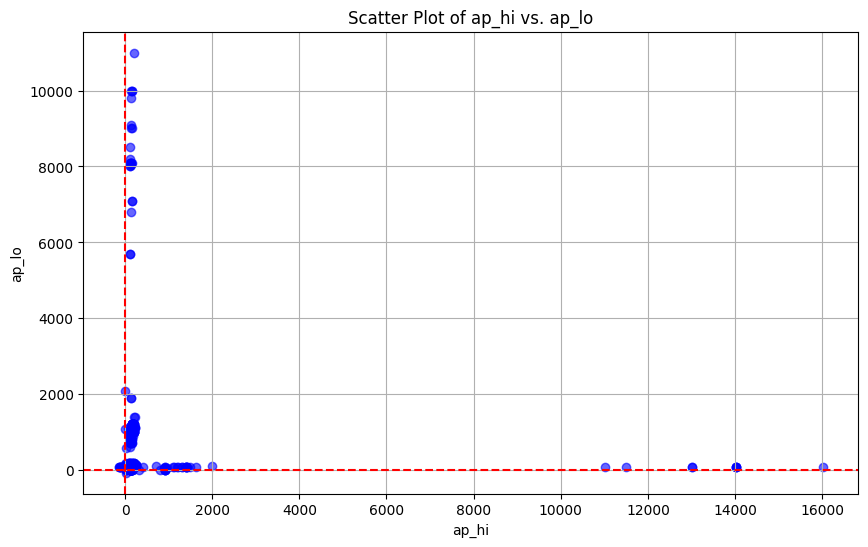

In [144]:
# Create a scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_cardio_base['ap_hi'], df_cardio_base['ap_lo'], color='blue', alpha=0.6)
plt.title('Scatter Plot of ap_hi vs. ap_lo')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')
plt.axhline(y=0, color='red', linestyle='--')  # Optional: horizontal line for reference
plt.axvline(x=0, color='red', linestyle='--')  # Optional: vertical line for reference
plt.grid(True)
plt.show()

In [149]:
## using z_score to calculate the presence of outlier in this table for further looking into the data.

from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df_cardio_base['ap_lo'])
outliers_z = df_cardio_base[(z_scores > 3) | (z_scores < -3)]

print(f"Outliers in 'ap_lo' using Z-score:\n\n {outliers_z}")

Outliers in 'ap_lo' using Z-score:

           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke
228      314  17489       2     183    98.0    160   1100            1      1
241      334  21932       2     157    60.0    160   1000            2      0
260      357  18217       1     150    83.0    140    800            1      0
329      458  23407       1     176    63.0    160   1000            2      0
345      482  18704       1     154    81.0    140   1000            2      0
...      ...    ...     ...     ...     ...    ...    ...          ...    ...
69771  99659  23330       1     167    81.0    160   1000            1      0
69872  99798  21808       1     152    56.0    160   1000            1      0
69878  99807  21239       2     168    95.0    160   1000            1      0
69885  99816  22417       2     166    78.0    170   1000            1      0
69967  99955  21416       2     168    63.0    140   1000            1      0

[951 rows x 9 columns]


## Cardio_alco  Assessment

In [112]:
df_cardio_alco.head(5)

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [113]:
df_cardio_alco.shape

(56903, 2)

In [114]:
df_cardio_alco.describe()

,id,alco
count,56903.000000,56903.000000
mean,48472.162065,0.053442
std,30994.121701,0.224915
min,44.000000,0.000000
25%,20401.000000,0.000000
50%,40763.000000,0.000000
75%,77109.500000,0.000000
max,99954.000000,1.000000


In [115]:
df_cardio_alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


In [116]:
def check_duplicate(data):
    duplicate_count = data.duplicated().sum()
    return duplicate_count

In [117]:
check_duplicate(df_cardio_base)

np.int64(0)

### Quality issue and observation

#### df_covid_data
- The new_deaths and new_cases column contains -ve value
- Presence of null value in the population, age_65_older_percent, gbp_per_capita, hospital_beds_per_thousand
- The date column is in object datatype
- The population column is in float dtype

#### df_cardio_base

- ap_hi and ap_low columns contains -ve value, which is not logical for blood pressure measureement
- age column is represented in days mot in years.
- Outrageous value for ap_hi and ap_lo columns. This indicate the presence of outliers in this columns.

#### df_cardio_alco

- this table is an extension of cardio_base table. It documents the alcohol intake of entities.

In [118]:
## duplicate dataframe for cleaning
covid_data_clean = df_covid_data.copy()
cardio_base_clean = df_cardio_base.copy()
cardio_alco_clean = df_cardio_alco.copy()

In [119]:
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


#### wrangling covid_data_clean

In [120]:
## drop empty row with all column empty
covid_data_clean.dropna(how='all', inplace=True)

## test
covid_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [121]:

# Inspect rows with null values in specified columns
null_rows = covid_data_clean[covid_data_clean[['population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']].isnull().any(axis=1)]

# Display the result
print(null_rows)

            location        date  new_cases  new_deaths  population  \
405          Andorra  2020-03-03          1           0     77265.0   
406          Andorra  2020-03-14          1           0     77265.0   
407          Andorra  2020-03-16          3           0     77265.0   
408          Andorra  2020-03-17          9           0     77265.0   
409          Andorra  2020-03-18          0           0     77265.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
405                      NaN             NaN                         NaN

In [122]:
# convert the nan value in the population column to 0 and change the dtype to int.

covid_data_clean['population'] = covid_data_clean['population'].fillna(0).astype(int)

#test
print(covid_data_clean['population'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 23082 entries, 0 to 23081
Series name: population
Non-Null Count  Dtype
--------------  -----
23082 non-null  int64
dtypes: int64(1)
memory usage: 180.5 KB
None


In [123]:
# Count number of values in column 'new_deaths' that are less than 0
count_less_than_zero = (covid_data_clean['new_deaths'] < 0).sum()

#test
print(f"Number of values less than 0 in column 'new_deaths': {count_less_than_zero}")

Number of values less than 0 in column 'new_deaths': 2


In [124]:
# Count number of values in column 'new_cases' that are less than 0
count_less_than_zero = (covid_data_clean['new_cases'] < 0).sum()

# test
print(f"Number of values less than 0 in column 'new_cases': {count_less_than_zero}")

Number of values less than 0 in column 'new_cases': 14


In [125]:
# create a new df for cardio_data without new_cases < 0
covid_data_clean = covid_data_clean[covid_data_clean['new_cases'] >= 0]

# test
count_less_than_zero = (covid_data_clean['new_cases'] < 0).sum()
print(f"Number of values less than 0 in column 'new_cases': {count_less_than_zero}")

Number of values less than 0 in column 'new_cases': 0


In [126]:
# create a new df for cardio_data without new_deaths < 0
covid_data_clean = covid_data_clean[covid_data_clean['new_deaths'] >= 0]

# test
count_less_than_zero = (covid_data_clean['new_deaths'] < 0).sum()
print(f"Number of values less than 0 in column 'new_deaths': {count_less_than_zero}")

Number of values less than 0 in column 'new_deaths': 0


In [127]:
# standardize the date column to datetime format (YYYY-MM-DD)

covid_data_clean['date'] = pd.to_datetime(covid_data_clean['date'], format='%Y-%m-%d')

# test
print(covid_data_clean['date'].dtype)

datetime64[ns]


In [128]:
covid_data_clean.describe()

,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23067,23067.000000,23067.000000,2.306700e+04,20630.000000,20697.000000,19130.000000
mean,2020-04-10 01:40:52.906749952,625.466771,35.695019,1.034627e+08,9.757235,22708.250406,3.205123
min,2019-12-31 00:00:00,0.000000,0.000000,0.000000e+00,1.144000,661.240000,0.100000
25%,2020-03-18 00:00:00,0.000000,0.000000,2.078932e+06,3.853000,6426.674000,1.400000
50%,2020-04-16 00:00:00,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,2020-05-14 00:00:00,55.000000,1.000000,3.346920e+07,15.168000,35220.084000,4.210000
max,2020-06-10 00:00:00,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000
std,NaN,5519.007781,330.826505,6.709949e+08,6.444802,21190.657817,2.594131


In [129]:
covid_data_clean.isnull().any()

location                      False
date                          False
new_cases                     False
new_deaths                    False
population                    False
aged_65_older_percent          True
gdp_per_capita                 True
hospital_beds_per_thousand     True
dtype: bool

## Wrangle the cardio_base dataframe

In [130]:
cardio_base_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [131]:
# Identify rows with empty or negative values from 'ap_hi' and 'ap_lo'
invalid_rows = cardio_base_clean[(cardio_base_clean['ap_hi'] < 0) | 
                                 (cardio_base_clean['ap_lo'] < 0) | 
                                 cardio_base_clean[['ap_hi', 'ap_lo']].isnull().any(axis=1)]

# Test before dropping the invalid rows
for idx, row in cardio_base_clean.iterrows():
    if row.equals(invalid_rows.loc[idx]) if idx in invalid_rows.index else False:
        print("there is invalid_rows")
        break
    else:
        pass

there is invalid_rows


In [132]:
# Drop invalid rows in place from cardio_base_clean
cardio_base_clean.drop(invalid_rows.index, inplace=True)


In [133]:
# Test for rows in invalid_rows after dropping them
invalid_found = False  # Flag to track if invalid rows are found

for idx, row in cardio_base_clean.iterrows():
    if row.equals(invalid_rows.loc[idx]) if idx in invalid_rows.index else False:
        print("there is invalid_rows")
        invalid_found = True
        break  

# Only print if invalid rows were dropped
if not invalid_found:
    print("negative and empty rows dropped")




negative and empty rows dropped


In [134]:
## convert age column to count from days to years

cardio_base_clean['age'] = (cardio_base_clean['age'] / 365).astype(int)

# Test
cardio_base_clean['age'].sample(5)

4898     64
54972    57
49583    53
33326    51
26589    52
Name: age, dtype: int64

In [135]:
cardio_base_clean.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000
mean,49973.395702,52.840696,1.349554,164.359384,74.206485,128.843868,96.634601,1.366885,0.088139
std,28851.700988,6.766341,0.476833,8.210423,14.395726,153.999302,188.482151,0.680272,0.283498
min,0.000000,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50003.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74890.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [150]:
cardio_alco_clean.drop_duplicates()

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


## Merged the cardio_base_clean with cardio_alco_clean

In [152]:
merged_cardio = pd.merge(cardio_base_clean, cardio_alco_clean, on= 'id', how='inner')

merged_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56896 entries, 0 to 56895
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56896 non-null  int64  
 1   age          56896 non-null  int64  
 2   gender       56896 non-null  int64  
 3   height       56896 non-null  int64  
 4   weight       56896 non-null  float64
 5   ap_hi        56896 non-null  int64  
 6   ap_lo        56896 non-null  int64  
 7   cholesterol  56896 non-null  int64  
 8   smoke        56896 non-null  int64  
 9   alco         56896 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.3 MB


In [153]:
merged_cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,40,1,159,60.0,110,70,1,0,0
1,45,56,1,160,73.0,130,85,1,0,0
2,46,60,2,173,82.0,140,90,3,0,0
3,47,55,1,163,55.0,120,80,1,0,0
4,49,50,2,175,95.0,120,80,1,0,0


### ANALYSIS

##### Question 1

- 1) How much heavier is the age group with the highest average weight than age group with the lowest weight?
- 2) Do people over 50 have higher cholesterol level than the rest?
- 3) Are men likely to be smoker than women
- 4) How tall are the tallest 1% of people?
- 5) which two feature have the highest spearman rank correlation?
- 6) % people that are more than 2 standard deviatin far from the average height?
- 7) What % of the population was 50 years old consume alcohol conumption information
- 8) Which of the following statements is true with 95% confidence?
- 9) When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?
- 10) Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases   as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?
- 11) Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.
- 12) What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!
- 13) What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants


In [ ]:
## using the origin clean dataframe cardio_base_clean

